# Petite Analyse des Corrélations 

In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df=pd.read_csv('clean_Bloc_files.csv')

# Quelques descriptions basiques et pas forcément utiles 

In [18]:
df.describe()

,B.I.S,BIS SR,DC,ET Des.,ET Sevo.,ETCO2,ETCO2 (mmHg),ETO2,FC,FICO2,...,PNIs,Pmax,Pmean,Pplat,RR(co2),SpO2,SvO2 (m),Temp,VT,id_patient
count,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,...,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000,64496.000000
mean,30.387667,1.190978,0.920335,0.528574,0.705535,3.866425,0.034332,61.660518,91.793947,1.674467,...,6.037373,23.973053,10.427236,2.450943,17.453541,88.067196,27.581326,27.800783,222.768721,350.032173
std,22.698587,7.351955,1.926440,6.218378,8.117271,7.680453,0.405031,32.283390,31.889523,12.067051,...,24.558401,16.396980,8.151691,9.963660,33.703401,46.637301,45.771027,38.781175,167.174037,40.722184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,41.000000,79.000000,0.000000,...,0.000000,6.000000,1.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,323.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,3.900000,0.000000,70.000000,95.000000,0.000000,...,0.000000,27.000000,12.000000,0.000000,16.000000,99.000000,0.000000,35.900000,266.000000,349.000000
75%,47.000000,0.000000,0.000000,0.000000,0.000000,4.900000,0.000000,91.000000,110.000000,0.000000,...,0.000000,36.000000,15.000000,0.000000,20.000000,100.000000,70.000000,37.000000,353.000000,382.000000
max,98.000000,100.000000,33.000000,99.000000,248.000000,100.000000,8.200000,265.000000,288.000000,261.000000,...,241.000000,127.000000,163.000000,195.000000,537.000000,528.000000,684.000000,882.000000,2751.000000,411.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64496 entries, 0 to 64495
Data columns (total 38 columns):
B.I.S           64496 non-null int64
BIS SR          64496 non-null float64
DC              64496 non-null float64
ET Des.         64496 non-null float64
ET Sevo.        64496 non-null float64
ETCO2           64496 non-null float64
ETCO2 (mmHg)    64496 non-null float64
ETO2            64496 non-null float64
FC              64496 non-null float64
FICO2           64496 non-null float64
FICO2 (mmHg)    64496 non-null int64
FIN2O           64496 non-null float64
FR              64496 non-null int64
FR(ecg)         64496 non-null int64
FiO2            64496 non-null float64
MAC             64496 non-null int64
NMT TOF         64496 non-null float64
NMTratio        64496 non-null float64
PAPdia          64496 non-null float64
PAPmoy          64496 non-null float64
PAPsys          64496 non-null float64
PASd            64496 non-null float64
PASm            64496 non-null float64
PASs

In [5]:
df.head()

,B.I.S,BIS SR,DC,ET Des.,ET Sevo.,ETCO2,ETCO2 (mmHg),ETO2,FC,FICO2,...,Pmax,Pmean,Pplat,RR(co2),SpO2,SvO2 (m),Temp,VT,id_patient,time
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,0.0,...,0,0,0,0.0,99.0,0.0,0.0,0.0,329,5:48
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,...,0,0,0,0.0,99.0,0.0,0.0,0.0,329,5:49
2,0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,117.0,0.0,...,1,1,0,0.0,97.0,0.0,0.0,0.0,329,5:50
3,0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,113.0,0.0,...,1,1,0,0.0,97.0,0.0,0.0,0.0,329,5:51
4,0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,112.0,0.0,...,1,1,0,0.0,97.0,0.0,0.0,0.0,329,5:52


## Corrélations 

On aimerait dans un premier temps observer la correlation entre les données.
Pour cela on utilise pour cela le coefficient empirique de Person : 

https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)#Coefficient_de_corr%C3%A9lation_lin%C3%A9aire_de_Bravais-Pearson

Il y a beaucoup de variables donc on voit pas grand chose ...

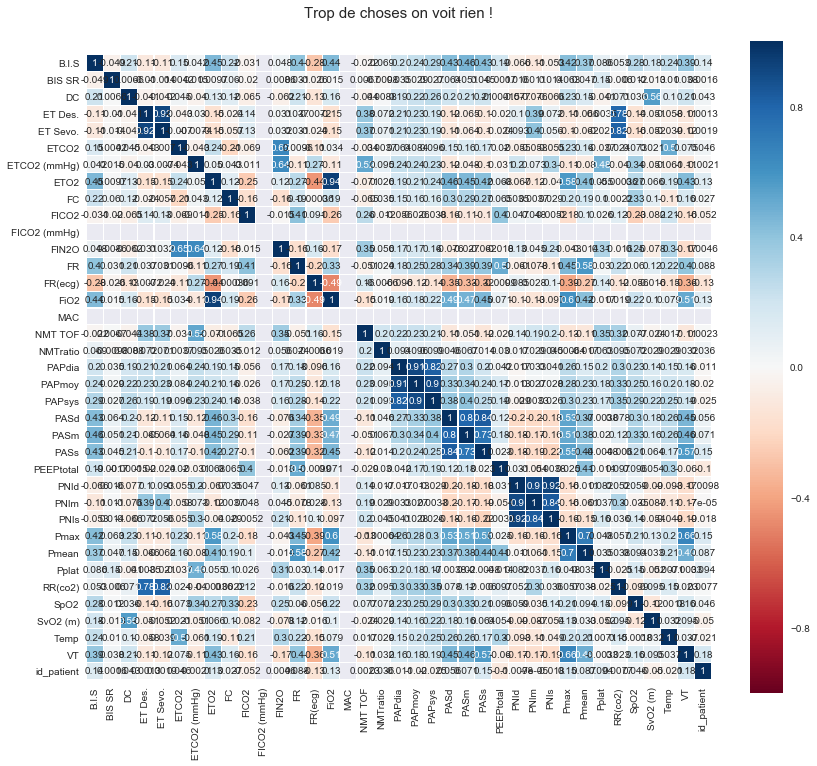

In [6]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Trop de choses on voit rien !', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

On se propose de ne regarder que les variables qui ont des correlations fortes :

Tout d'abord positives (càd entre 0.5 et 1) :

In [7]:
mp_corr=df.corr()
mp_corr_forte_positive=mp_corr[(mp_corr>=0.5) & (mp_corr<1)].dropna(how='all').dropna(axis=1,how='all')

On trouve le nombre de corrélations positives fortes

In [8]:
mp_corr_forte_positive.shape

(26, 26)

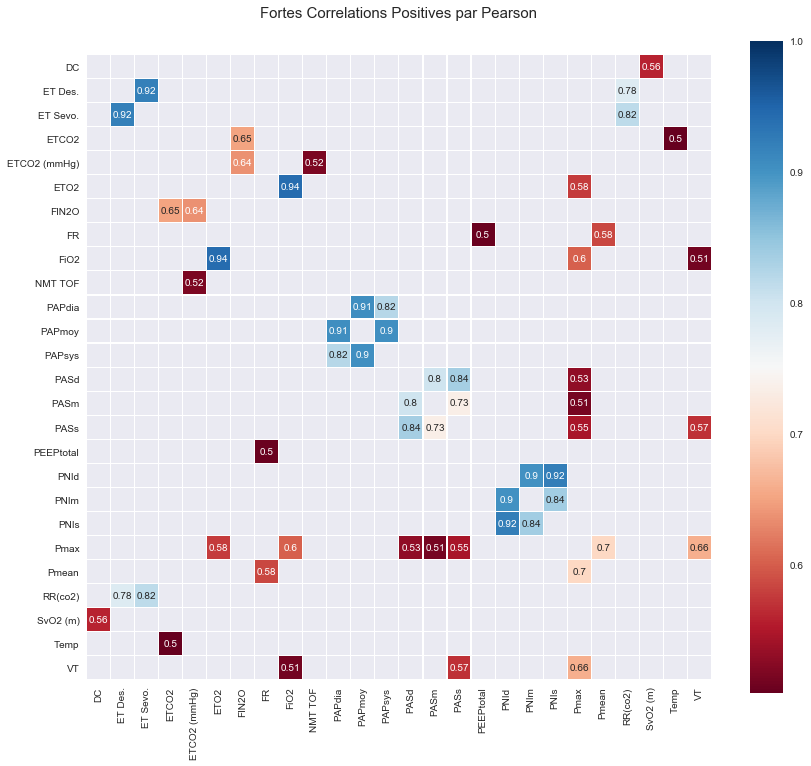

In [9]:
plt.figure(figsize=(14,12))
plt.title('Fortes Correlations Positives par Pearson', y=1.05, size=15)
sns.heatmap(mp_corr_forte_positive,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Il ne semble pas y avoir de correlations négatives "fortes" (càd entre -1 et -0.5)

In [10]:
mp_corr_forte_negative=mp_corr[mp_corr<-0.5].dropna(how='all').dropna(axis=1,how='all')
mp_corr_forte_negative

""


Mais il y en a quand même beaucoup de correlation négative ...

In [11]:
mp_corr_negative=mp_corr[mp_corr<0].dropna(how='all').dropna(axis=1,how='all')
mp_corr_negative.shape

(35, 35)

On regarde donc les corrélations négatives que l'on considère "moyenne" (càd entre -0.5 et -0.2) :

In [12]:
mp_corr_moy_negative=mp_corr[mp_corr<-0.2].dropna(how='all').dropna(axis=1,how='all')
mp_corr_moy_negative.shape

(17, 17)

Certaines sont plutôt significatives :

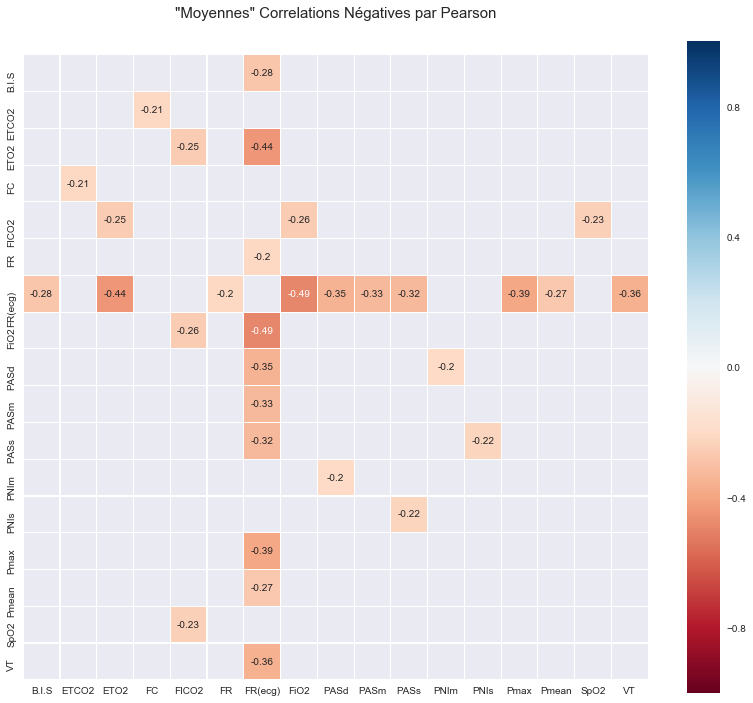

In [13]:
plt.figure(figsize=(14,12))
plt.title('"Moyennes" Correlations Négatives par Pearson', y=1.05, size=15)
sns.heatmap(mp_corr_moy_negative,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

On se propose maintenant de combinant les deux ( on choisit arbitrairement comme corrélations négatives significatives à partir de -0.35 pour l'instant) :

In [14]:
mp_corr_moy_forte=mp_corr[(mp_corr<-0.35) | ((mp_corr>=0.5) & (mp_corr<1))].dropna(how='all').dropna(axis=1,how='all')
mp_corr_moy_forte.shape

(27, 27)

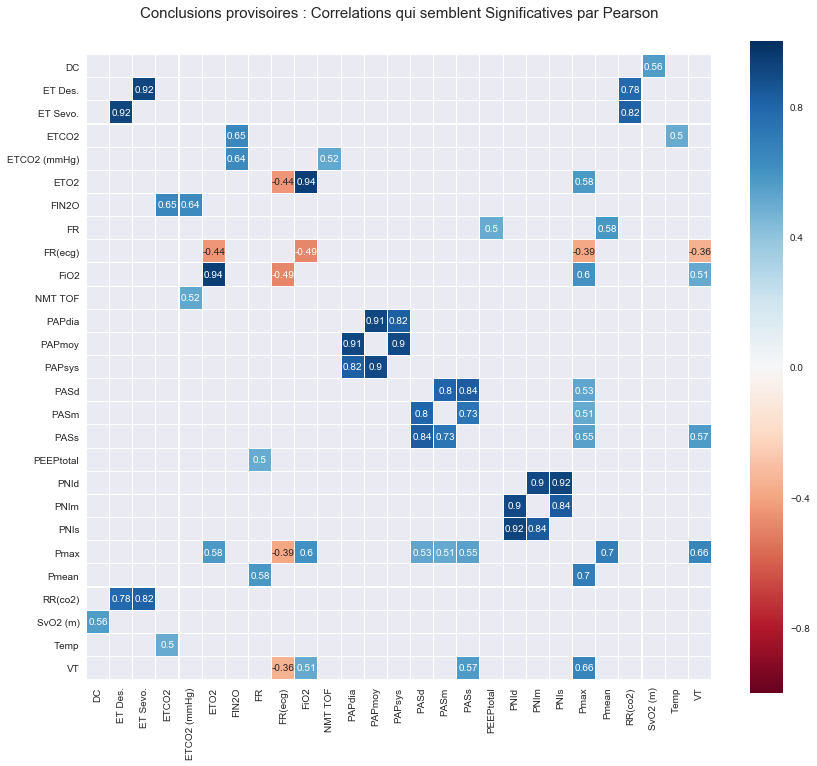

In [15]:
plt.figure(figsize=(14,12))
plt.title('Conclusions provisoires : Correlations qui semblent Significatives par Pearson', y=1.05, size=15)
sns.heatmap(mp_corr_moy_forte,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Suite :
-Analyser les corrélations 
-Choix des Variables 